In [3]:
# Load the dataset
import pandas as pd

df = pd.read_csv("C:/Users/dutta/Desktop/iris-knn-classification/data/iris.csv")

print("Initial Dataset Shape:", df.shape)

# Task 1: Data Cleaning & Preprocessing

# Drop the unnecessary ID column if present
if 'Id' in df.columns:
    df = df.drop('Id', axis=1)

# Check for missing values
print("\nMissing values in dataset:\n", df.isnull().sum())

# Save the cleaned version
df.to_csv("C:/Users/dutta/Desktop/iris-knn-classification/data/iris_cleaned.csv", index=False)
print(" Cleaned dataset saved as: data/iris_cleaned.csv")


Initial Dataset Shape: (150, 6)

Missing values in dataset:
 SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
 Cleaned dataset saved as: data/iris_cleaned.csv


In [4]:
df = pd.read_csv("C:/Users/dutta/Desktop/iris-knn-classification/data/iris_cleaned.csv")


C:\Users\dutta\AppData\Local\Temp\ipykernel_10432\700352962.py:9: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dutta\AppData\Local\Temp\ipykernel_10432\700352962.py:10: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.savefig("C:/Users/dutta/Desktop/iris-knn-classification/images/eda_boxplot.png")
c:\Users\dutta\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


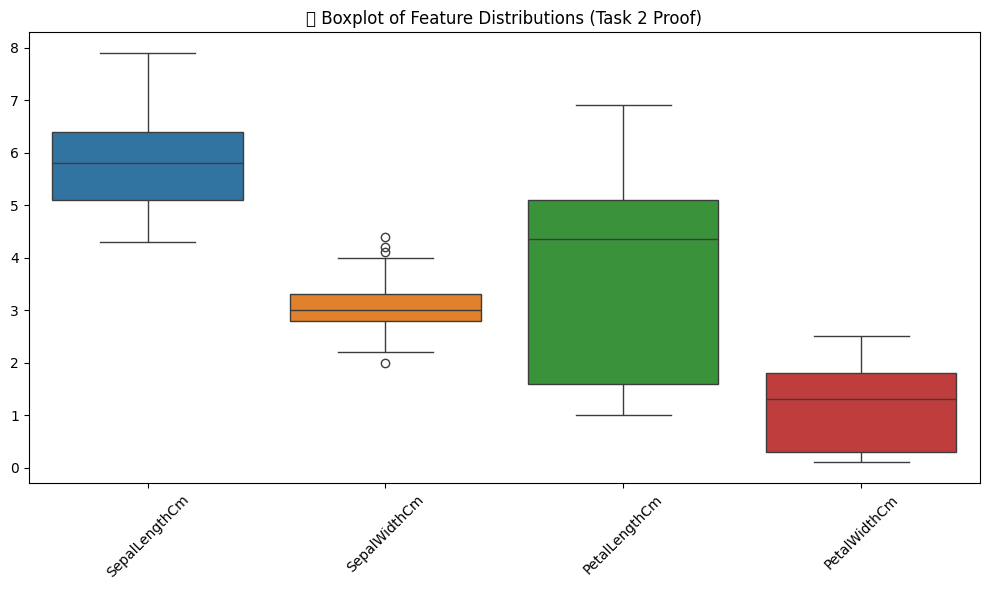

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ EDA: Boxplot for feature distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.iloc[:, :-1])  # All columns except 'Species'
plt.title("📦 Boxplot of Feature Distributions (Task 2 Proof)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("C:/Users/dutta/Desktop/iris-knn-classification/images/eda_boxplot.png")
plt.show()


C:\Users\dutta\AppData\Local\Temp\ipykernel_10432\446736315.py:5: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\dutta\AppData\Local\Temp\ipykernel_10432\446736315.py:6: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.savefig("C:/Users/dutta/Desktop/iris-knn-classification/images/eda_heatmap.png")
c:\Users\dutta\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


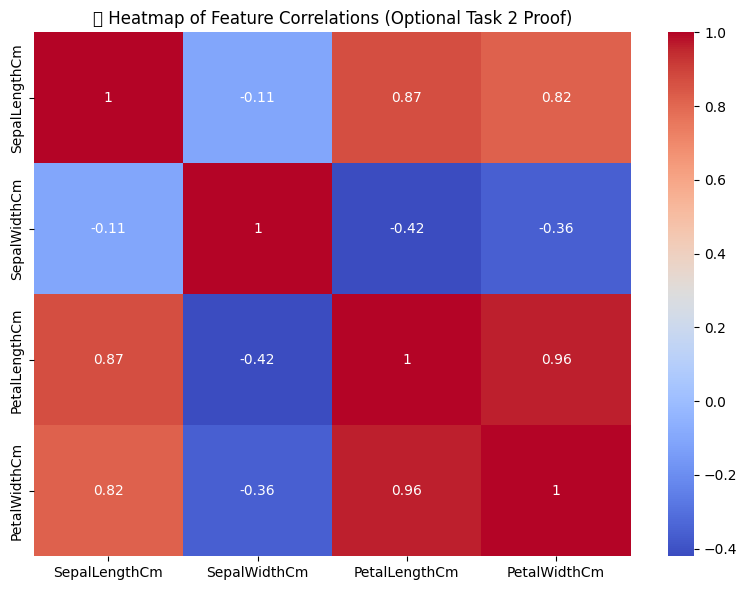

In [ ]:
# Optional: Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, cmap="coolwarm")
plt.title(" Heatmap of Feature Correlations (Optional Task 2 Proof)")
plt.tight_layout()
plt.savefig("C:/Users/dutta/Desktop/iris-knn-classification/images/eda_heatmap.png")
plt.show()


In [15]:
# Drop 'Id' column only if it exists
if 'Id' in df.columns:
    df.drop('Id', axis=1, inplace=True)

# Check for null values
print("Missing values:\n", df.isnull().sum())

# Check data types
print("\nData types:\n", df.dtypes)

# Class distribution
print("\nClass distribution:\n", df['Species'].value_counts())



Missing values:
 SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Data types:
 SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

Class distribution:
 Species
0    50
1    50
2    50
Name: count, dtype: int64


In [11]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode target labels (Species)
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

# Show mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)

# Separate features (X) and target (y)
X = df.drop('Species', axis=1)
y = df['Species']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Final shape check
print("X_scaled shape:", X_scaled.shape)
print("y shape:", y.shape)


Label Mapping: {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2)}
X_scaled shape: (150, 4)
y shape: (150,)


 Accuracy for different K values:
K = 1: Accuracy = 96.67%
K = 2: Accuracy = 93.33%
K = 3: Accuracy = 93.33%
K = 4: Accuracy = 93.33%
K = 5: Accuracy = 93.33%
K = 6: Accuracy = 93.33%
K = 7: Accuracy = 96.67%
K = 8: Accuracy = 93.33%
K = 9: Accuracy = 96.67%
K = 10: Accuracy = 96.67%
K = 11: Accuracy = 96.67%
K = 12: Accuracy = 96.67%
K = 13: Accuracy = 96.67%
K = 14: Accuracy = 93.33%
K = 15: Accuracy = 93.33%

 Best K selected: 1 with Accuracy: 96.67%


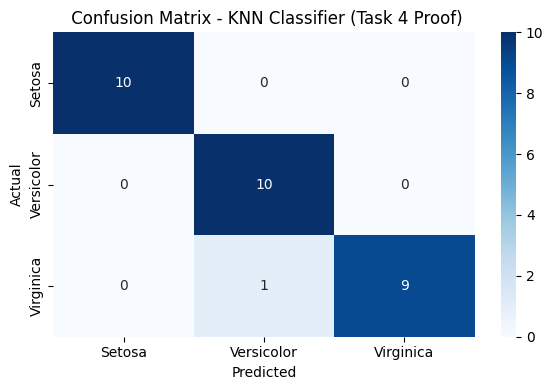


 Classification Report:

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       0.91      1.00      0.95        10
   Virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

#  Step 1: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

#  Step 2: Try different K values and store best
best_k = 1
best_acc = 0

print(" Accuracy for different K values:")
for k in range(1, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"K = {k}: Accuracy = {acc * 100:.2f}%")
    if acc > best_acc:
        best_k = k
        best_acc = acc

#  Step 3: Final model with best K
print(f"\n Best K selected: {best_k} with Accuracy: {best_acc * 100:.2f}%")
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#  Step 4: Confusion Matrix (Visual Proof)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=["Setosa", "Versicolor", "Virginica"],
            yticklabels=["Setosa", "Versicolor", "Virginica"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(" Confusion Matrix - KNN Classifier (Task 4 Proof)")
plt.tight_layout()
plt.savefig("C:/Users/dutta/Desktop/iris-knn-classification/images/confusion_matrix.png")
plt.show()

#  Step 5: Print Classification Report
print("\n Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Setosa", "Versicolor", "Virginica"]))



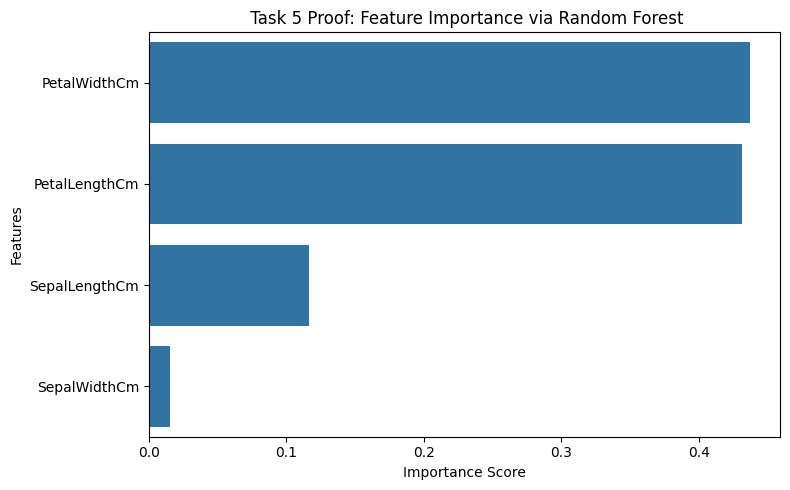

In [14]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

#  Task 5 Proof: Feature Importance using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = df.drop("Species", axis=1).columns

# Sort feature importances
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title(" Task 5 Proof: Feature Importance via Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.savefig("C:/Users/dutta/Desktop/iris-knn-classification/images/feature_importance.png")
plt.show()


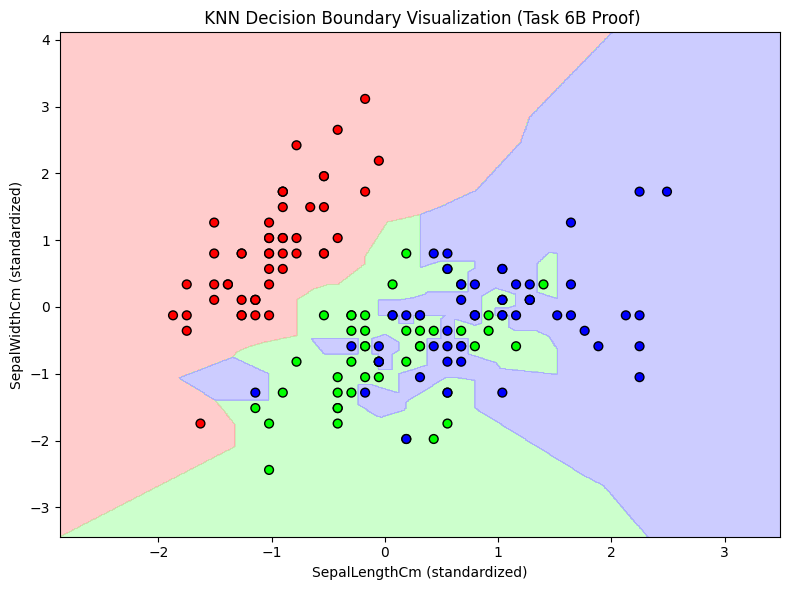

In [17]:
#  Visual Proof — KNN Decision Boundary

from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

# Use only first 2 features for 2D plotting (SepalLengthCm and SepalWidthCm)
X_2d = X_scaled[:, :2]  # Take only first two columns
y_2d = y

# Fit KNN on 2D data
knn_2d = KNeighborsClassifier(n_neighbors=1)
knn_2d.fit(X_2d, y_2d)

# Create mesh grid
x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict on mesh grid
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=cmap_bold, edgecolor='k', s=40)
plt.xlabel("SepalLengthCm (standardized)")
plt.ylabel("SepalWidthCm (standardized)")
plt.title(" KNN Decision Boundary Visualization (Task 6B Proof)")

#  Save the figure to images folder
plt.tight_layout()
plt.savefig("C:/Users/dutta/Desktop/iris-knn-classification/images/knn_decision_boundary.png")
plt.show()
